In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
!pip install google-cloud-bigquery

In [3]:
from google.cloud import bigquery
from google.colab import data_table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import textwrap
import matplotlib.patches as patches

In [4]:
project= 'techchallengepnad'
location='US'
client = bigquery.Client(project = project, location = location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [5]:
#Query para genero e idade
query_genero_idade = """SELECT
CASE
  WHEN  Sexo ='1' THEN "Homem"
  WHEN Sexo='2'  THEN "Mulher"
END as Sexo,
Idade
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_genero_idade)
results = query_job.result()

df_genero_idade = client.query(query_genero_idade).to_dataframe()

In [8]:
query_sociais = """SELECT
CASE
  WHEN  Sexo ='1' THEN "Masculino"
  WHEN Sexo='2'  THEN "Feminino"
END as Sexo,
Idade,
TestePositivo,
Escolaridade,
EntubadoRespArt,
RestringiuContato,
TemAlcool,
TemMascara,
Escolaridade,
Estado,
Domicilio,
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_sociais)
results = query_job.result()

df_sociais = client.query(query_sociais).to_dataframe()

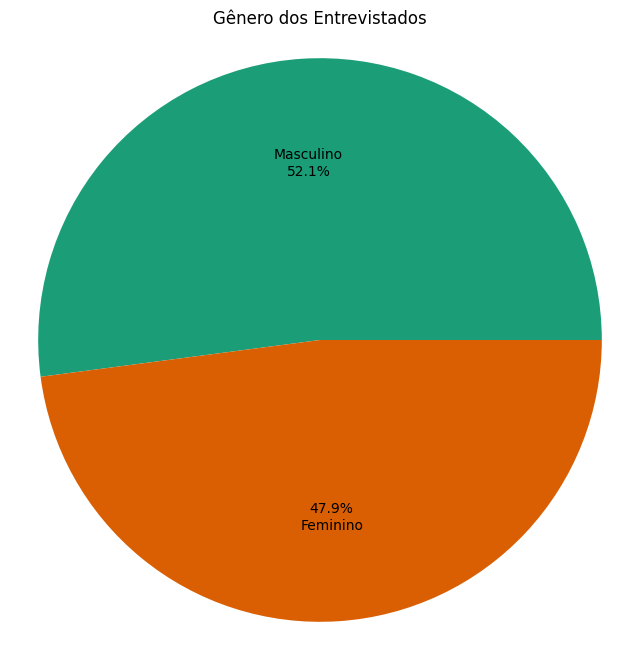

In [9]:
grouped = df_sociais.groupby('Sexo').size()

# Plotting a pie chart
plt.figure(figsize=(8, 8))  # Adjust size if needed
patches, texts, _ = plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'), labeldistance=-0.66)

# Adjusting label positions
for text in texts:
    text.set_horizontalalignment('center')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Gênero dos Entrevistados')

plt.savefig('pie_Generos.png')
plt.show()

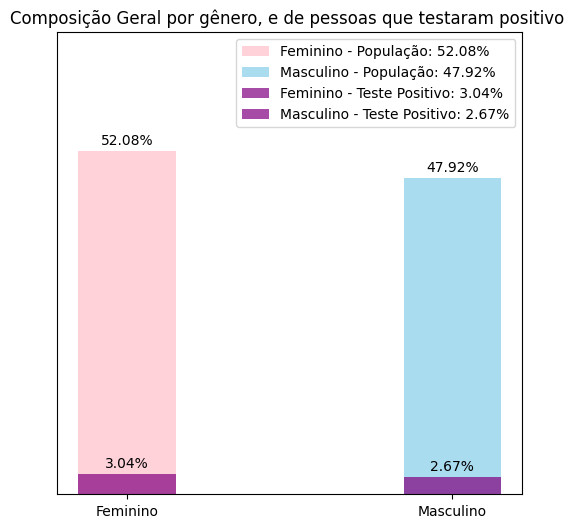

In [10]:
# Calculando as contagens por sexo
grouped_sex = df_sociais.groupby('Sexo').size()

# Calculando as contagens por sexo e por teste positivo
grouped_positive = df_sociais[df_sociais['TestePositivo'] == 'sim'].groupby('Sexo').size()

# Calculando a porcentagem de teste positivo por sexo
percent_positive = (grouped_positive / grouped_sex) * 100

# Calculando a porcentagem de cada sexo na população total
percent_sex = (grouped_sex / len(df_sociais)) * 100

# Plotando o gráfico de barras
plt.figure(figsize=(6, 6))  # Ajuste o tamanho conforme necessário

colors = {'Masculino': 'skyblue', 'Feminino': 'pink'}
# Adicionando as barras de porcentagem de cada sexo na população total
for i, (sexo, percent) in enumerate(zip(grouped_sex.index, percent_sex)):
    plt.bar(sexo, percent, label=f'{sexo} - População: {percent:.2f}%', alpha=0.7, width=0.3,color=colors[sexo])
    plt.text(i, percent + 0.5, f'{percent:.2f}%', ha='center', va='bottom')

# Adicionando as barras de porcentagem de teste positivo por sexo
for i, (sexo, percent) in enumerate(zip(grouped_sex.index, percent_positive)):
    plt.bar(sexo, percent, color='purple', label=f'{sexo} - Teste Positivo: {percent:.2f}%', alpha=0.7,width=0.3)
    plt.text(i, percent + 0.5, f'{percent:.2f}%', ha='center', va='bottom')

# Removendo os eixos
plt.ylim(0, 70)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Exibindo o gráfico
plt.title('Composição Geral por gênero, e de pessoas que testaram positivo ')
plt.legend(loc='best')  # Movendo a legenda para fora do gráfico
plt.savefig('barras_teste_positivo_por_sexo.png')
plt.show()


<ipython-input-11-17bfbed36996>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentagem_por_faixa.index, y=porcentagem_por_faixa.values, palette='Dark2', label='Porcentagem Total')


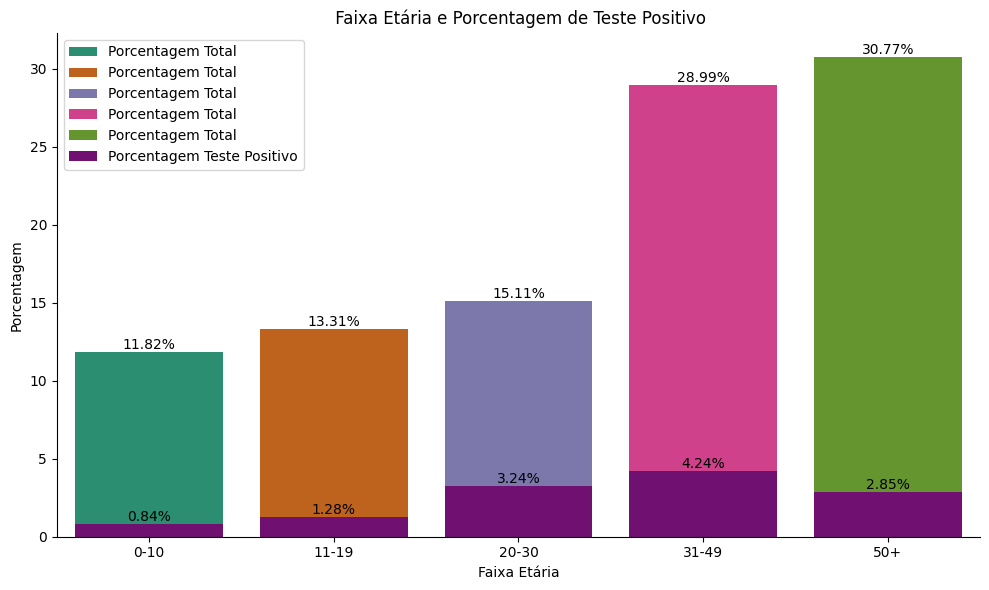

In [11]:
# Convertendo a coluna 'Idade' para inteiro
df_sociais['Idade'] = df_sociais['Idade'].astype(int)

# Definindo os limites das faixas etárias
limites = [0, 10, 19, 30, 50, float('inf')]

# Definindo os rótulos das faixas etárias
rotulos = ['0-10', '11-19', '20-30', '31-49', '50+']

# Criando a coluna de faixas etárias usando pd.cut()
df_sociais['Faixa Etária'] = pd.cut(df_sociais['Idade'], bins=limites, labels=rotulos, right=False)

# Agrupando por faixa etária e contando as ocorrências em cada grupo
contagem_por_faixa = df_sociais.groupby('Faixa Etária').size()

# Calculando a porcentagem de cada faixa etária em relação ao total
porcentagem_por_faixa = (contagem_por_faixa / contagem_por_faixa.sum()) * 100

# Calculando as contagens por faixa etária e por teste positivo
grouped_positive = df_sociais[df_sociais['TestePositivo'] == 'sim'].groupby('Faixa Etária').size()

# Calculando a porcentagem de teste positivo por faixa etária
porcentagem_positive_por_faixa = (grouped_positive / contagem_por_faixa) * 100

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))  # Tamanho do gráfico

# Plotando as barras com as porcentagens de contagem por faixa etária
ax = sns.barplot(x=porcentagem_por_faixa.index, y=porcentagem_por_faixa.values, palette='Dark2', label='Porcentagem Total')

# Adicionando as labels em cada barra de porcentagem total
for index, value in enumerate(porcentagem_por_faixa):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Plotando as barras com as porcentagens de teste positivo por faixa etária
sns.barplot(x=porcentagem_positive_por_faixa.index, y=porcentagem_positive_por_faixa.values,color='purple', label='Porcentagem Teste Positivo')

# Adicionando as labels em cada barra de porcentagem de teste positivo
for index, value in enumerate(porcentagem_positive_por_faixa):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Removendo as bordas superior e direita do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionando rótulos aos eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem')
plt.title(' Faixa Etária e Porcentagem de Teste Positivo')

# Exibindo o gráfico
plt.xticks(rotation=0)  # Ajustando a orientação dos rótulos no eixo x
plt.tight_layout()  # Ajustando layout para evitar corte de labels
plt.savefig('teste_positivo_por_faixa_etaria.png')
plt.show()


In [12]:
#Consultando os dados da população a respeito da etnia
query_etnia = """SELECT
RacaCor,
TestePositivo,
CASE
  WHEN RacaCor = '1' THEN 'Branca'
  WHEN RacaCor = '2' THEN 'Preta'
  WHEN RacaCor = '3' THEN 'Amarela'
  WHEN RacaCor = '4' THEN 'Parda'
  WHEN RacaCor = '5' THEN 'Indigena'
  WHEN RacaCor = '9' THEN 'N/A'
END AS etnia,
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_genero_idade)
results = query_job.result()

df_etnia = client.query(query_etnia).to_dataframe()

In [13]:
df_etnia = df_etnia[df_etnia['etnia'] != 'N/A']

In [14]:
!pip install squarify

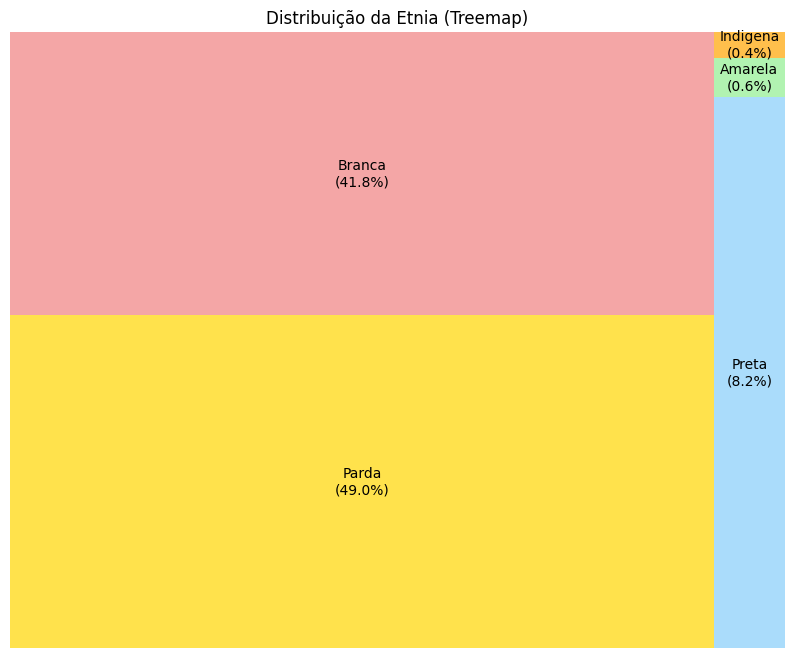

In [15]:
import squarify

# Calcular a contagem de ocorrências de cada etnia, excluindo 'N/A'
contagem_etnia = df_etnia[df_etnia['etnia'] != 'N/A']['etnia'].value_counts()

# Calcular o total de contagem
total_contagem = contagem_etnia.sum()

# Calcular as porcentagens para cada etnia
porcentagens = [(count / total_contagem) * 100 for count in contagem_etnia.values]

# Configurar as cores
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']

# Plotar o treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=contagem_etnia.values, label=[f'{etnia}\n({porcentagem:.1f}%)' for etnia, porcentagem in zip(contagem_etnia.index, porcentagens)], color=colors, alpha=0.7)

# Adicionar título
plt.title('Distribuição da Etnia (Treemap)')

# Remover eixos
plt.axis('off')

# Exibir o treemap
plt.savefig('treemapEtnia.png')
plt.show()


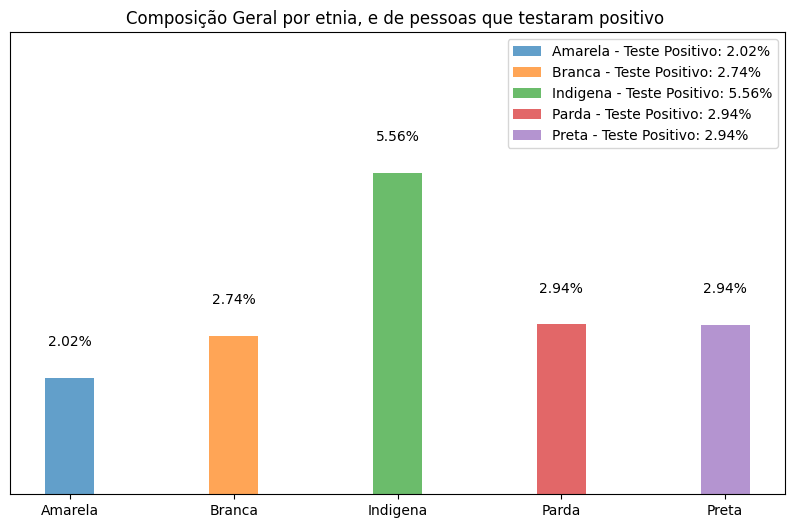

In [16]:
# Calculando as contagens por etnia
grouped_etnia = df_etnia.groupby('etnia').size()

# Calculando as contagens por etnia e por teste positivo
grouped_positive = df_etnia[df_etnia['TestePositivo'] == 'sim'].groupby('etnia').size()

# Calculando a porcentagem de teste positivo por etnia
percent_positive = (grouped_positive / grouped_etnia) * 100

# Calculando a porcentagem de cada etnia na população total
percent_etnia = (grouped_etnia / len(df_etnia)) * 100

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário

# Adicionando as barras de porcentagem de teste positivo por etnia
for i, (etnia, percent) in enumerate(zip(grouped_etnia.index, percent_positive)):
    plt.bar(etnia, percent, label=f'{etnia} - Teste Positivo: {percent:.2f}%', alpha=0.7,width=0.3)
    plt.text(i, percent + 0.5, f'{percent:.2f}%', ha='center', va='bottom')

# Removendo os eixos
plt.ylim(0, 8)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Exibindo o gráfico
plt.title('Composição Geral por etnia, e de pessoas que testaram positivo ')
plt.legend(loc='best')  # Movendo a legenda para fora do gráfico
plt.savefig('barras_teste_positivo_por_etnia.png')
plt.show()


In [17]:
#Consultando os dados da população a respeito do estado
query_uf = """SELECT
estado,
TestePositivo,
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_uf)
results = query_job.result()

df_uf = client.query(query_uf).to_dataframe()

In [18]:
!pip install squarify

In [19]:
# Selecionar os top 10 estados com base na contagem de ocorrências
top_10_estados = df_uf['estado'].value_counts().nlargest(10)

# Inverter a ordem dos top 10 estados
top_10_estados = top_10_estados.iloc[::-1]

# Calcular o total de contagem
total_contagem = top_10_estados.sum()

# Calcular a porcentagem que cada estado representa do total de contagem
top_10_estados_porcentagem = (top_10_estados / total_contagem) * 100

# Calcular a porcentagem da população de cada estado que teve um teste positivo
porcentagem_teste_positivo = []
for estado in top_10_estados.index:
    total_estado = len(df_uf[df_uf['estado'] == estado])
    teste_positivo_estado = len(df_uf[(df_uf['estado'] == estado) & (df_uf['TestePositivo'] == 'sim')])
    porcentagem_teste_positivo.append((teste_positivo_estado / total_estado) * 100)

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Porcentagem de Respondentes", "Porcentagem de Teste Positivo"))

# Adicionar o gráfico de barras para a porcentagem de respondentes
fig.add_trace(go.Bar(
    x=top_10_estados_porcentagem,
    y=top_10_estados.index,
    orientation='h',
    text=[f"{x:.2f}%" for x in top_10_estados_porcentagem],
    textposition='auto',
    name="Porcentagem de Respondentes"
), row=1, col=1)

# Adicionar o gráfico de barras para a porcentagem de teste positivo
fig.add_trace(go.Bar(
    x=porcentagem_teste_positivo,
    y=top_10_estados.index,
    orientation='h',
    text=[f"{x:.2f}%" for x in porcentagem_teste_positivo],
    textposition='auto',
    name="Porcentagem de Teste Positivo",
    marker=dict(color='rgba(0, 128, 0, 0.5)')
), row=1, col=2)

# Atualizar o layout do gráfico
fig.update_layout(
    title="Top 10 Estados por Porcentagem de Respondentes e Porcentagem de Teste Positivo",
    xaxis_title="Porcentagem",
    yaxis_title="Estado",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="black"
    ),
    showlegend=False
)

# Exibir o gráfico
plt.savefig('estadosEpositivos.png')
fig.show()


<Figure size 640x480 with 0 Axes>

In [20]:
#Consultando os dados da população a respeito da escolaridade
query_escolaridade_sexo = """SELECT
TestePositivo,
CASE
  WHEN Escolaridade = '1' THEN 'Sem instrução'
  WHEN Escolaridade = '2' THEN 'Fundamental incompleto'
  WHEN Escolaridade = '3' THEN 'Fundamental completo'
  WHEN Escolaridade = '4' THEN 'Médio incompleto'
  WHEN Escolaridade = '5' THEN 'Médio completo'
  WHEN Escolaridade = '6' THEN 'Superior incompleto'
  WHEN Escolaridade = '7' THEN 'Superior completo'
  WHEN Escolaridade = '8' THEN 'Pós-graduação, mestrado ou doutorado'
END AS Escolaridade
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_escolaridade_sexo)
results = query_job.result()

df_escolaridade = client.query(query_escolaridade_sexo).to_dataframe()

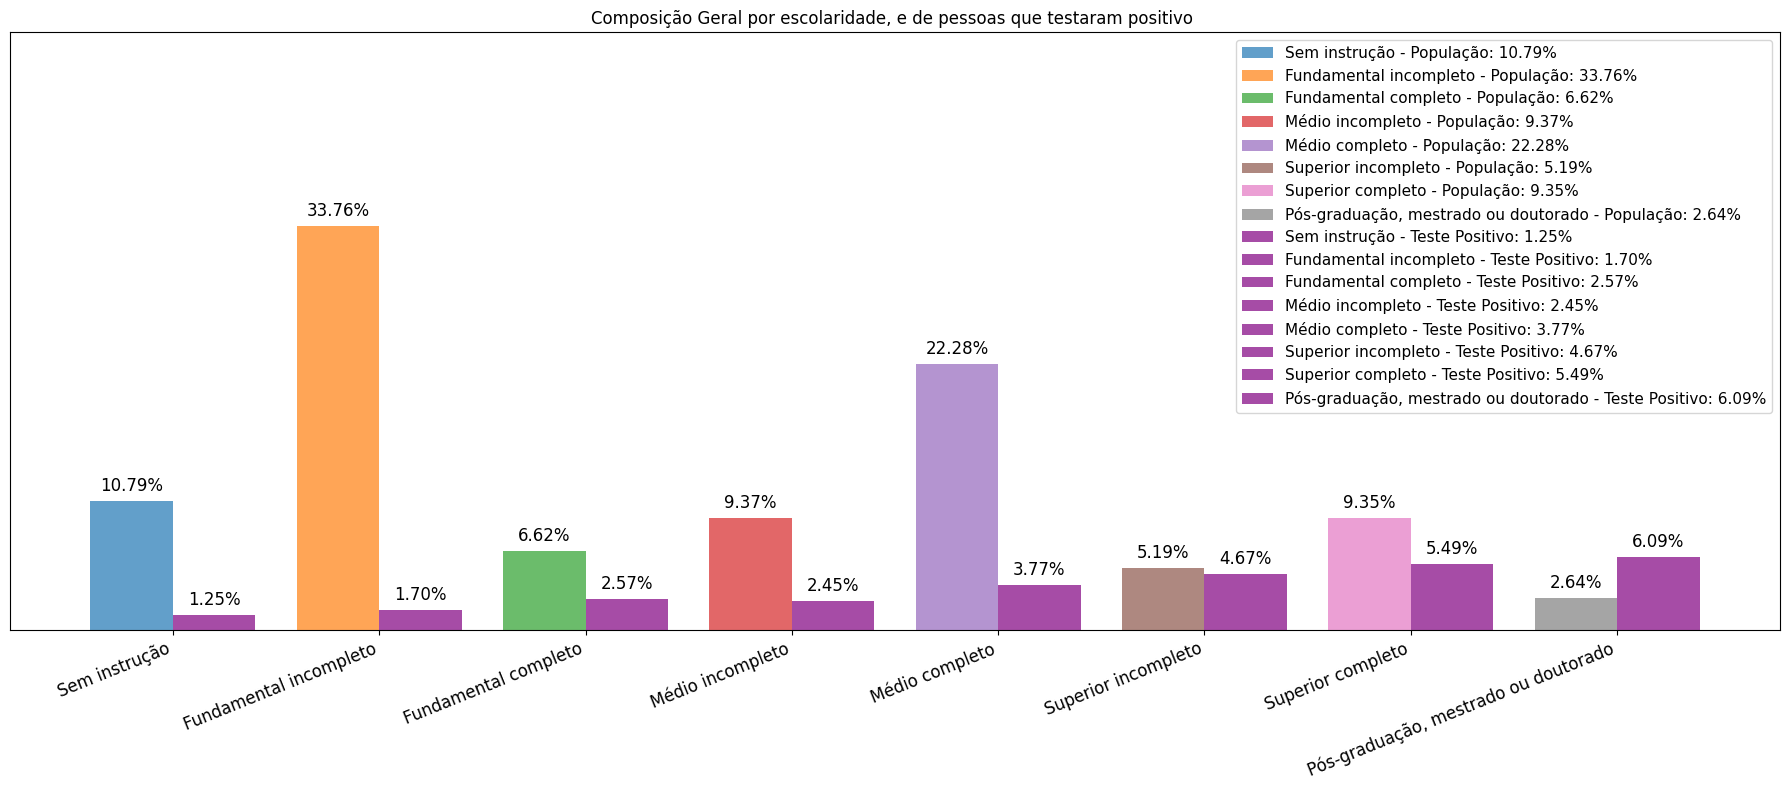

In [21]:
# Especificando a ordem desejada dos rótulos de x
order = ['Sem instrução', 'Fundamental incompleto', 'Fundamental completo',
         'Médio incompleto', 'Médio completo', 'Superior incompleto',
         'Superior completo', 'Pós-graduação, mestrado ou doutorado']

# Calculando as contagens por Escolaridade
grouped_sex = df_escolaridade.groupby('Escolaridade').size().reindex(order)

# Calculando as contagens por Escolaridade e por teste positivo
grouped_positive = df_escolaridade[df_escolaridade['TestePositivo'] == 'sim'].groupby('Escolaridade').size().reindex(order)

# Calculando a porcentagem de teste positivo por Escolaridade
percent_positive = (grouped_positive / grouped_sex) * 100

# Calculando a porcentagem de cada Escolaridade na população total
percent_sex = (grouped_sex / len(df_escolaridade)) * 100

# Plotando o gráfico de barras
plt.figure(figsize=(18, 8))  # Ajuste o tamanho conforme necessário

# Adicionando as barras de porcentagem de cada Escolaridade na população total
for i, (Escolaridade, percent) in enumerate(zip(grouped_sex.index, percent_sex)):
    plt.bar(i - 0.2, percent, label=f'{Escolaridade} - População: {percent:.2f}%', alpha=0.7, width=0.4)
    plt.text(i - 0.2, percent + 0.5, f'{percent:.2f}%', ha='center', va='bottom', fontsize=12)

# Adicionando as barras de porcentagem de teste positivo por Escolaridade
for i, (Escolaridade, percent) in enumerate(zip(grouped_sex.index, percent_positive)):
    plt.bar(i + 0.2, percent, color='purple', label=f'{Escolaridade} - Teste Positivo: {percent:.2f}%', alpha=0.7, width=0.4)
    plt.text(i + 0.2, percent + 0.5, f'{percent:.2f}%', ha='center', va='bottom', fontsize=12)

# Configurando os ticks e rótulos do eixo x
plt.xticks(range(len(grouped_sex.index)), grouped_sex.index, rotation=22, ha='right', fontsize=12)

# Removendo os eixos
plt.ylim(0, 50)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Exibindo o gráfico
plt.title('Composição Geral por escolaridade, e de pessoas que testaram positivo ')
plt.legend(loc='best',fontsize=11)  # Movendo a legenda para fora do gráfico
plt.tight_layout()  # Ajustando o layout para evitar sobreposição de elementos
plt.savefig('escolaridadeEpositivos.png')
plt.show()


In [22]:
#Consultando os dados da população a respeito do plano de saude
query_plano_saude = """SELECT
CASE
  WHEN PlanoSaude = '1' THEN 'Sim'
  WHEN PlanoSaude = '2' THEN 'Não'
  WHEN PlanoSaude = '3' THEN 'N/A'
END AS PlanoSaude
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_plano_saude)
results = query_job.result()

df_escolaridade = client.query(query_plano_saude).to_dataframe()

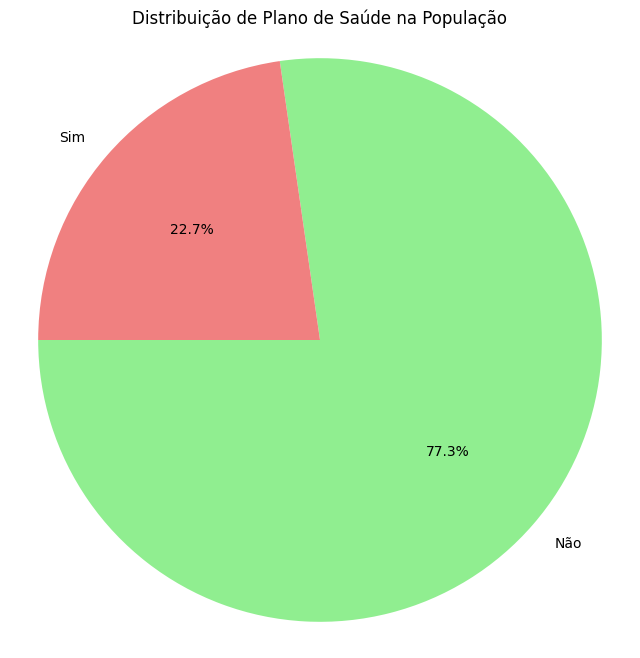

In [23]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada categoria de plano de saúde
contagem_plano_saude = df_escolaridade['PlanoSaude'].value_counts()

# Definir os rótulos e os tamanhos das fatias
labels = contagem_plano_saude.index
sizes = contagem_plano_saude.values

# Definir as cores
cores = ['lightgreen', 'lightcoral', 'lightskyblue']

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=180)

# Adicionar título
plt.title('Distribuição de Plano de Saúde na População')

# Exibir o gráfico
plt.axis('equal')
plt.savefig('pizzaPlanoSaude.png')
plt.show()


In [24]:
#Consultando os dados da população a respeito da mascara
query_mascara = """SELECT
CASE
  WHEN TemMascara = '1' THEN 'Sim'
  WHEN TemMascara = '2' THEN 'Não'
  WHEN TemMascara = '3' THEN 'Não sabe'
END AS TemMascara,
TestePositivo,
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_mascara)
results = query_job.result()

df_mascara = client.query(query_mascara).to_dataframe()

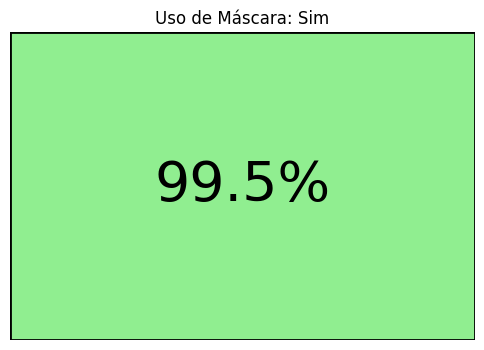

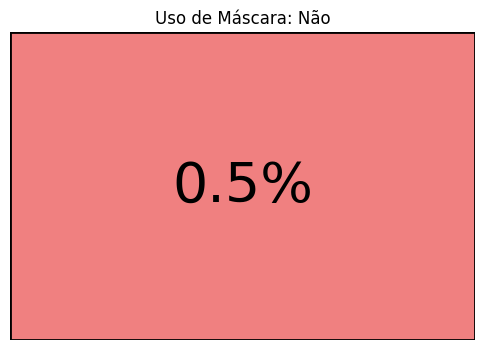

In [25]:
import matplotlib.patches as patches
# Calcular a contagem de ocorrências de cada categoria de uso de máscara
contagem_mascara = df_mascara['TemMascara'].value_counts()

# Extrair os valores para 'Sim' e 'Não'
valor_sim = contagem_mascara.get('Sim', 0)
valor_nao = contagem_mascara.get('Não', 0)

# Calcular a porcentagem para cada categoria
total = valor_sim + valor_nao
porcentagem_sim = (valor_sim / total) * 100
porcentagem_nao = (valor_nao / total) * 100

# Criar o gráfico de card para 'Sim'
fig, ax = plt.subplots(figsize=(6, 4))
rect_sim = patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='lightgreen')
ax.add_patch(rect_sim)
plt.text(0.5, 0.5, f"{porcentagem_sim:.1f}%", fontsize=40, ha='center', va='center', color='black')
plt.axis('off')
plt.title('Uso de Máscara: Sim')

# Criar o gráfico de card para 'Não'
fig, ax = plt.subplots(figsize=(6, 4))
rect_nao = patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='lightcoral')
ax.add_patch(rect_nao)
plt.text(0.5, 0.5, f"{porcentagem_nao:.1f}%", fontsize=40, ha='center', va='center', color='black')
plt.axis('off')
plt.title('Uso de Máscara: Não')

# Exibir os gráficos
plt.savefig('treeUsoMascara.png')
plt.show()

In [26]:
#Consultando os dados da população a respeito da mascara
query_RestringiuContato = """SELECT
CASE
  WHEN RestringiuContato = '1' THEN 'Não fez restrição'
  WHEN RestringiuContato = '2' THEN 'Reduziu o contato com as pessoas'
  WHEN RestringiuContato = '3' THEN 'Ficou em casa e só saiu em caso de necessidade básica'
  WHEN RestringiuContato = '4' THEN 'Ficou rigorosamente em casa'
  WHEN RestringiuContato = '5' THEN 'N/A'
END AS RestringiuContato,
TestePositivo,
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_RestringiuContato)
results = query_job.result()

df_contato = client.query(query_RestringiuContato).to_dataframe()

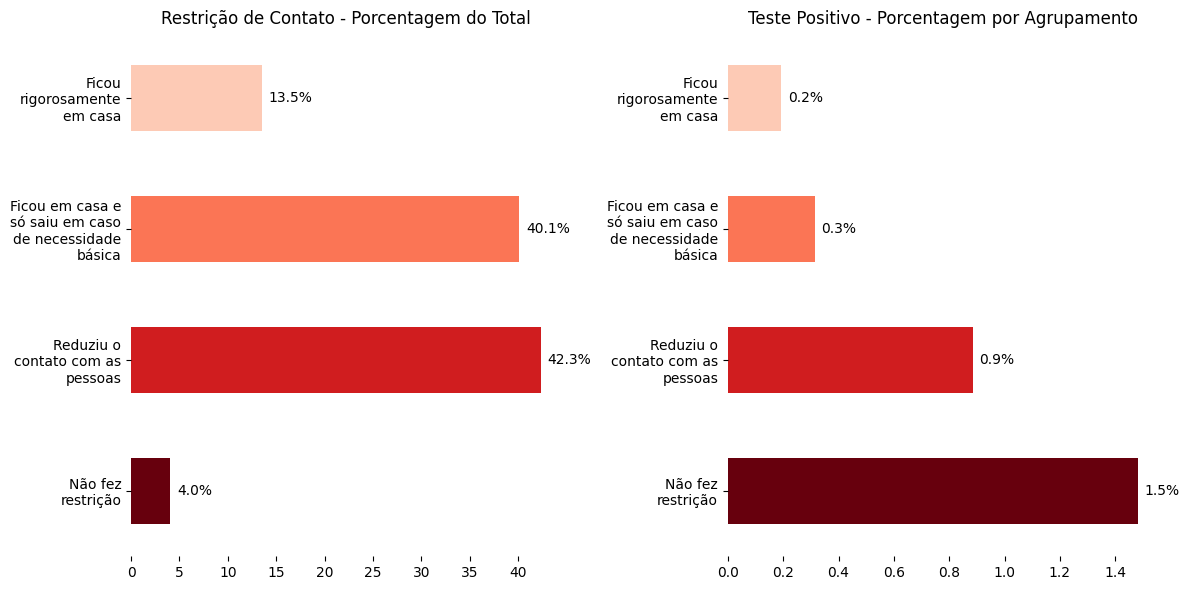

In [27]:
# Dados
data = {
    'Restrição de Contato': ['Não fez restrição', 'Reduziu o contato com as pessoas',
                              'Ficou em casa e só saiu em caso de necessidade básica',
                              'Ficou rigorosamente em casa']
}

# Suponha que você tenha um DataFrame df_contato com a coluna 'RestringiuContato' e 'TestePositivo'

# Contagem total de cada categoria para 'RestringiuContato'
contagem_total = df_contato['RestringiuContato'].value_counts()

# Contagem de testes positivos para cada categoria de 'RestringiuContato'
contagem_positivo = df_contato[df_contato['TestePositivo'] == 'sim']['RestringiuContato'].value_counts()

# Calcular porcentagens de testes positivos dentro de cada categoria
porcentagens_positivo = (contagem_positivo / contagem_total.sum()) * 100

# Reindexar as contagens de 'RestringiuContato' e 'porcentagens_positivo' na ordem especificada
contagem_total = contagem_total.reindex(data['Restrição de Contato']).fillna(0)

# Criar cores em degradê de vermelho para 'RestringiuContato'
colors_contato = plt.cm.Reds(np.linspace(1, 0.2, len(contagem_total)))

# Plotar o gráfico de barras horizontais para 'RestringiuContato'
plt.figure(figsize=(12, 6))

porcentagem=(contagem_total / contagem_total.sum() * 100)

plt.subplot(1, 2, 1)
(contagem_total / contagem_total.sum() * 100).plot(kind='barh', color=colors_contato)
plt.title('Restrição de Contato - Porcentagem do Total')

# Adicionar os data labels à direita das barras para 'RestringiuContato'
for i, (cat, valor) in enumerate(porcentagem.items()):
    plt.annotate(f"{valor:.1f}%",
                 xy=(valor, i),
                 xytext=(5, 0),  # Deslocamento horizontal e vertical do texto
                 textcoords="offset points",
                 ha='left', va='center')

# Quebrar as linhas das legendas do eixo y
categorias_quebradas = [textwrap.fill(cat, 15) for cat in contagem_total.index]
plt.yticks(range(len(contagem_total)), categorias_quebradas)

# Remover título do eixo y
plt.ylabel(None)

# Remover a moldura
plt.box(False)

# Plotar o gráfico de barras horizontais para 'TestePositivo'=='sim'
plt.subplot(1, 2, 2)
porcentagens_positivo.plot(kind='barh', color=colors_contato)
plt.title('Teste Positivo - Porcentagem por Agrupamento')

# Adicionar os data labels à direita das barras para 'TestePositivo'=='sim'
for i, (cat, valor) in enumerate(porcentagens_positivo.items()):
    plt.annotate(f"{valor:.1f}%",
                 xy=(valor, i),
                 xytext=(5, 0),  # Deslocamento horizontal e vertical do texto
                 textcoords="offset points",
                 ha='left', va='center')

# Quebrar as linhas das legendas do eixo y
plt.yticks(range(len(porcentagens_positivo)), categorias_quebradas)

# Remover título do eixo y
plt.ylabel(None)

# Remover a moldura
plt.box(False)

plt.tight_layout()
plt.savefig('RestricaovsPositivos.png')
plt.show()

In [28]:
query_sintomas = """SELECT Febre,
DorOlhos as `Dor nos Olhos`,
CheiroSabor as `Dificuldade com Cheiro e Sabor`,
DorMuscular as `Dor Muscular`,
Diarreia as `Diarréia`,
Tosse,
DorGarganta as `Dor de Garganta`,
DificuldadeRespiracao as `Dificuldade para respirar`,
DorDeCabeca as `Dor de Cabeça`,
DorNoPeito as `Dor no Peito`,
Nausea,
NarizEntupido as `Nariz Entupido`,
Fadiga,
FoiEstabSaude,
EntubadoRespArt as `PrecisouSerEntubado`,
PlanoSaude,
TestePositivo
FROM `techchallengepnad.Pnad91011.TabelaPrincipal09a11` """

query_job = client.query(query_sintomas)
results = query_job.result()

df_sintomas = client.query(query_sintomas).to_dataframe()

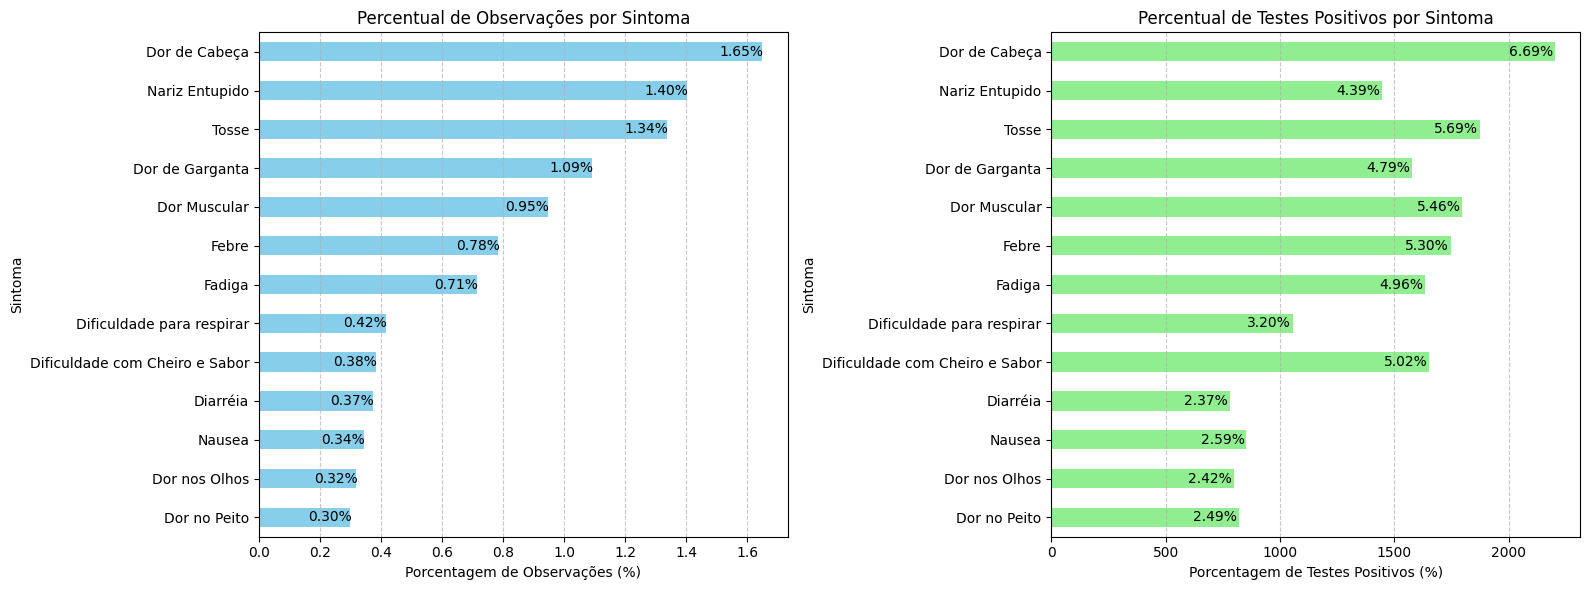

In [31]:
# Total de observações
total_observacoes = len(df_sintomas)

# Contando o número de observações com cada sintoma
contagem_sintomas = (df_sintomas.iloc[:, :13] == '1').sum()

# Ordenar as contagens de sintomas da maior para a menor
contagem_sintomas_sorted = contagem_sintomas.sort_values(ascending=True)

# Calculando a porcentagem de observações com cada sintoma em relação ao total de observações
porcentagem_sintomas = (contagem_sintomas_sorted / total_observacoes * 100)


# Definindo os dados para o segundo gráfico
df_sintomas_positivos = df_sintomas[df_sintomas['TestePositivo'] == 'sim']
total_observacoes_positivas = len(df_sintomas_positivos)
contagem_sintomas_positivos = (df_sintomas_positivos.iloc[:, :13] == '1').sum()
porcentagem_sintomas_positivos = (contagem_sintomas_positivos / total_observacoes_positivas * 100)

# Ordenar as contagens de sintomas positivos da mesma maneira que os sintomas originais
contagem_sintomas_positivos_sorted = contagem_sintomas_positivos.reindex(contagem_sintomas_sorted.index)

# Criando uma figura e definindo subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotando o primeiro gráfico no primeiro subplot
bars1 = porcentagem_sintomas.plot(kind='barh', color='skyblue', ax=ax1)
ax1.set_title('Percentual de Observações por Sintoma')
ax1.set_xlabel('Porcentagem de Observações (%)')
ax1.set_ylabel('Sintoma')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionando anotações ao lado de cada barra
for index, value in enumerate(porcentagem_sintomas):
    ax1.annotate(f'{value/100:.2%}', xy=(value, index), xytext=(value - 0.14, index),
                 color='black', fontsize=10, ha='left', va='center')

# Plotando o segundo gráfico no segundo subplot
bars2 = contagem_sintomas_positivos_sorted.plot(kind='barh', color='lightgreen', ax=ax2)
ax2.set_title('Percentual de Testes Positivos por Sintoma')
ax2.set_xlabel('Porcentagem de Testes Positivos (%)')
ax2.set_ylabel('Sintoma')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionando anotações ao lado de cada barra no segundo gráfico
for index, value in enumerate(contagem_sintomas_positivos_sorted):
    percentual = value / total_observacoes_positivas * 100
    ax2.annotate(f'{percentual:.2f}%', xy=(value, index), xytext=(value - 200, index),
                 color='black', fontsize=10, ha='left', va='center')

plt.tight_layout()
plt.savefig('SintomasVsPositivos.png')
plt.show()

In [ ]:
porcentagem_sintomas_positivos

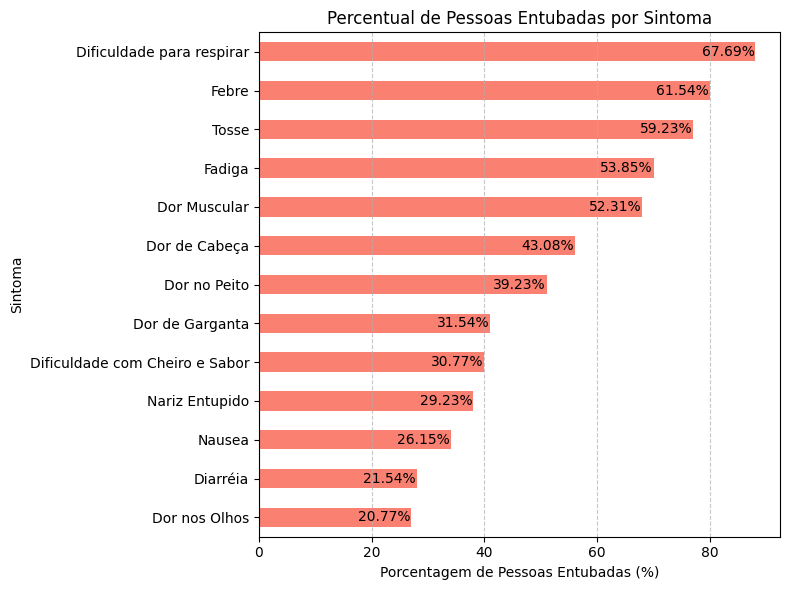

In [50]:
# Definindo os dados para o terceiro gráfico
df_sintomas_entubados = df_sintomas[df_sintomas['PrecisouSerEntubado'] == '1']
total_observacoes_entubadas = len(df_sintomas_entubados)
contagem_sintomas_entubados = (df_sintomas_entubados.iloc[:, :13] == '1').sum()
porcentagem_sintomas_entubados = (contagem_sintomas_entubados / total_observacoes_entubadas * 100)

# Ordenar as contagens de sintomas entubados da maior para a menor porcentagem
contagem_sintomas_entubados_sorted = contagem_sintomas_entubados.sort_values(ascending=True)

# Criando uma nova figura e definindo subplots
fig, ax3 = plt.subplots(figsize=(8, 6))

# Plotando o  gráfico
bars3 = contagem_sintomas_entubados_sorted.plot(kind='barh', color='salmon', ax=ax3)
ax3.set_title('Percentual de Pessoas Entubadas por Sintoma')
ax3.set_xlabel('Porcentagem de Pessoas Entubadas (%)')
ax3.set_ylabel('Sintoma')
ax3.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionando anotações ao lado de cada barra no terceiro gráfico
for index, value in enumerate(contagem_sintomas_entubados_sorted):
    percentual = value / total_observacoes_entubadas * 100
    ax3.annotate(f'{percentual:.2f}%', xy=(value, index), xytext=(value-9.5, index),
                 color='black', fontsize=10, ha='left', va='center')

plt.tight_layout()
plt.savefig('EntubadosTiveramSintomas.png')
plt.show()

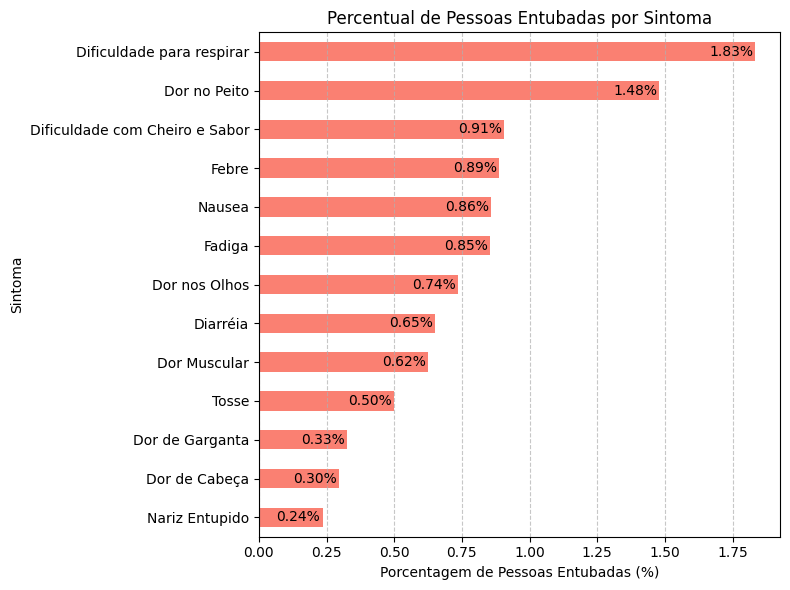

In [55]:
# Definindo os dados para o terceiro gráfico
total_observacoes = len(df_sintomas)
contagem_sintomas = (df_sintomas.iloc[:, :13] == '1').sum()
contagem_sintomas_entubados = (df_sintomas[df_sintomas['PrecisouSerEntubado'] == '1'].iloc[:, :13] == '1').sum()

# Calcular a porcentagem de pessoas entubadas para cada sintoma
porcentagem_sintomas_entubados = (contagem_sintomas_entubados / contagem_sintomas * 100)

# Ordenar as porcentagens de pessoas entubadas por sintoma
porcentagem_sintomas_entubados_sorted = porcentagem_sintomas_entubados.sort_values(ascending=True)

# Criando uma nova figura e definindo subplots
fig, ax3 = plt.subplots(figsize=(8, 6))

# Plotando o gráfico
bars3 = porcentagem_sintomas_entubados_sorted.plot(kind='barh', color='salmon', ax=ax3)
ax3.set_title('Percentual de Pessoas Entubadas por Sintoma')
ax3.set_xlabel('Porcentagem de Pessoas Entubadas (%)')
ax3.set_ylabel('Sintoma')
ax3.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionando anotações ao lado de cada barra no terceiro gráfico
for index, value in enumerate(porcentagem_sintomas_entubados_sorted):
    ax3.annotate(f'{value:.2f}%', xy=(value, index), xytext=(value-0.17, index),
                 color='black', fontsize=10, ha='left', va='center')

plt.tight_layout()
plt.savefig('SintomasVsEntubados.png')
plt.show()